In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sales = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
#for submission

submission = pd.DataFrame()

submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']
submission['Purchase'] = np.nan

In [ ]:
submission

,User_ID,Product_ID,Purchase
0,1000004,P00128942,NaN
1,1000009,P00113442,NaN
2,1000010,P00288442,NaN
3,1000010,P00145342,NaN
4,1000011,P00053842,NaN
...,...,...,...
233594,1006036,P00118942,NaN
233595,1006036,P00254642,NaN
233596,1006036,P00031842,NaN
233597,1006037,P00124742,NaN


# Data Exploration


In [ ]:
sales.shape

(550068, 12)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
sales.User_ID.nunique()

5891

In [ ]:
sales.Product_ID.nunique()

3631

In [ ]:
sales.Gender.value_counts(normalize=True)*100

,proportion
Gender,
M,75.310507
F,24.689493


In [ ]:
sales.Age.value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
sales.Occupation.nunique()

21

In [ ]:
sales.City_Category.value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


In [ ]:
sales.Stay_In_Current_City_Years.value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


In [ ]:
sales.Marital_Status.value_counts()

,count
Marital_Status,
0,324731
1,225337


# Missing Data

In [ ]:
# lets combine the data for data prep

test['Purchase']=np.nan
sales['data']='train'
test['data']='test'
test=test[sales.columns]
combined=pd.concat([sales,test],axis=0)


In [ ]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN,test


In [ ]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [ ]:
sales.isna().sum().sort_values(ascending=False)

,0
Product_Category_3,383247
Product_Category_2,173638
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0


In [ ]:
#percent of missing data relevant to all data
percent = (sales.isnull().sum()/sales.isnull().count()).sort_values(ascending=False)
percent

,0
Product_Category_3,0.696727
Product_Category_2,0.315666
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000


In [ ]:
combined.drop('Product_Category_3',axis=1,inplace=True)

In [ ]:
combined.Product_Category_2.value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [ ]:
#imputed missing values with random values in the same probability distribution as given feature already had

vc = combined.Product_Category_2.value_counts(normalize = True)
miss = combined.Product_Category_2.isna()
combined.loc[miss, 'Product_Category_2'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [ ]:
combined.Product_Category_2.value_counts()

,count
Product_Category_2,
8.0,133310
14.0,114750
2.0,102691
16.0,89745
15.0,78962
5.0,54275
4.0,53512
6.0,34349
11.0,29515


In [ ]:
combined.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


**Exploratory Data Analysis**

In [ ]:
#using the train data part from combined dataset for eda

sales_1 = combined[combined['data']=='train']

Univariate Analysis:

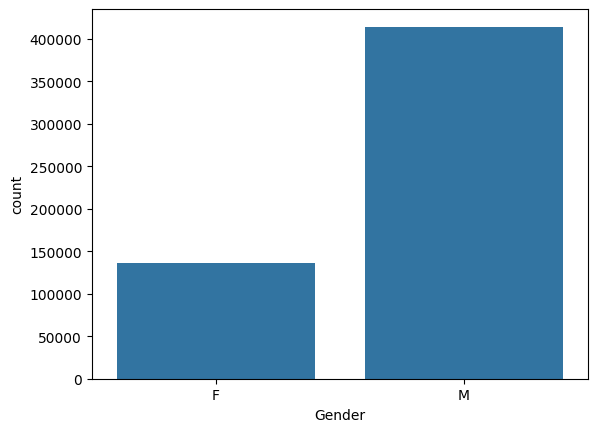

In [ ]:
sns.countplot(x=sales_1['Gender'])
plt.show()

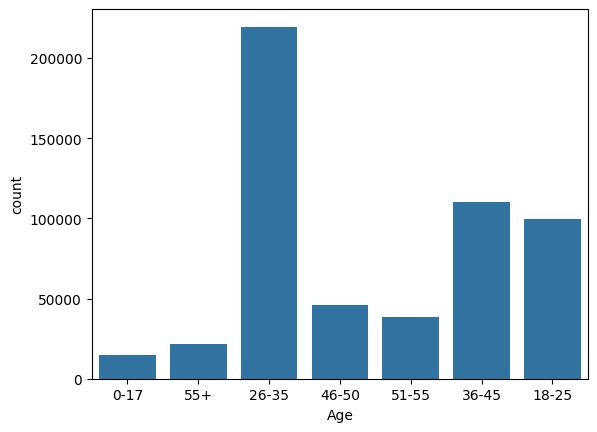

In [ ]:
sns.countplot(x=sales_1['Age'])
plt.show()

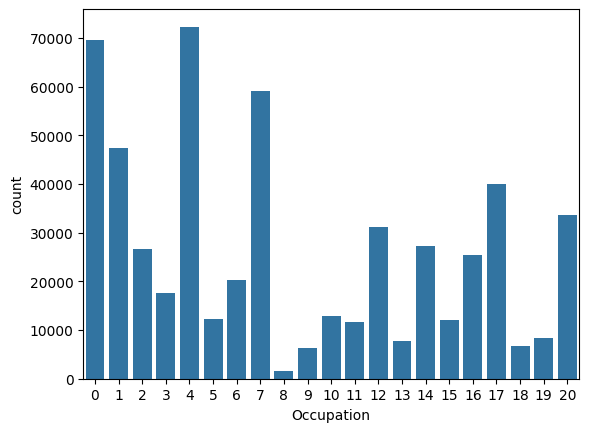

In [ ]:
sns.countplot(x=sales_1['Occupation'])
plt.show()

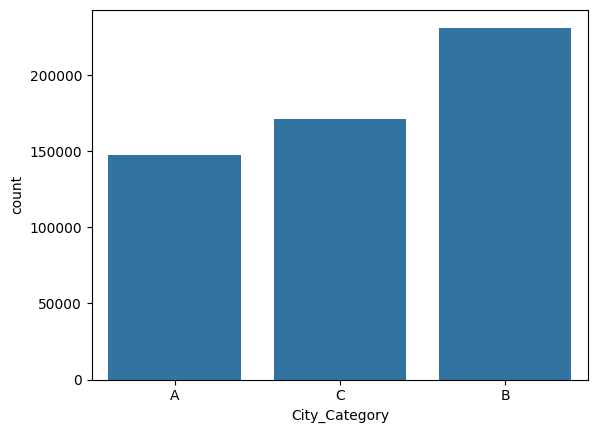

In [ ]:
sns.countplot(x=sales_1['City_Category'])
plt.show()

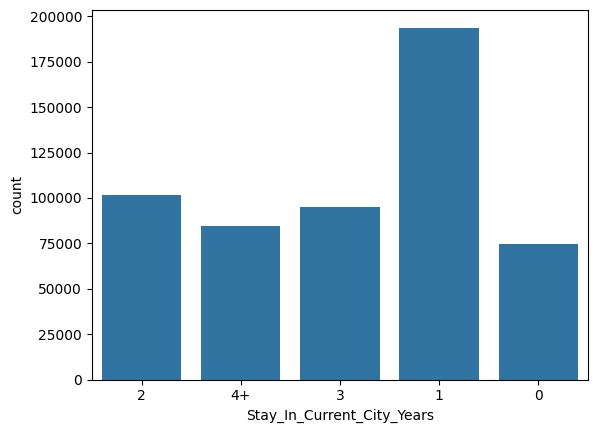

In [ ]:
sns.countplot(x=sales_1['Stay_In_Current_City_Years'])
plt.show()

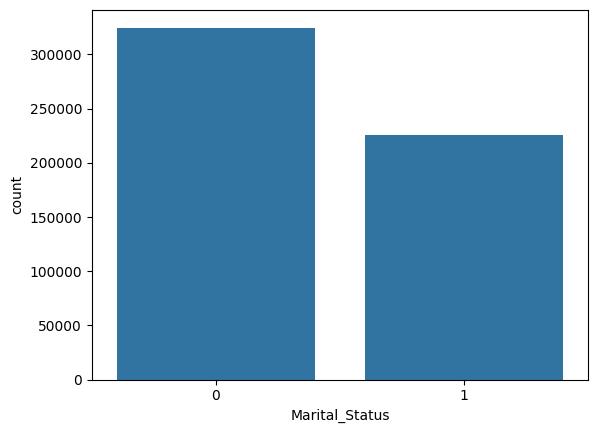

In [ ]:
sns.countplot(x=sales_1['Marital_Status'])
plt.show()

Bivariate Analysis / Multivariate Analysis:

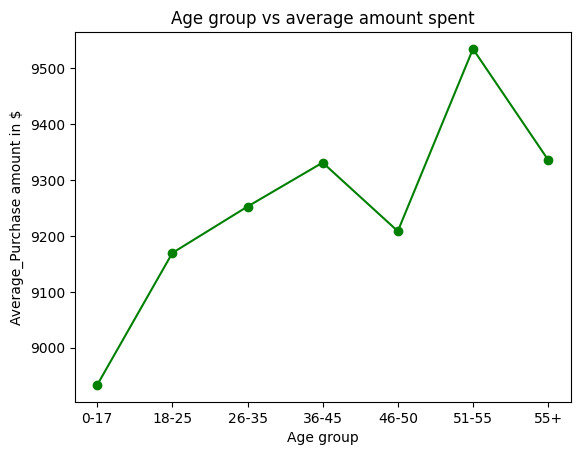

In [ ]:
# Avearge amount spend by different age groups

data = sales_1.groupby('Age')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='g')
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');
plt.show()

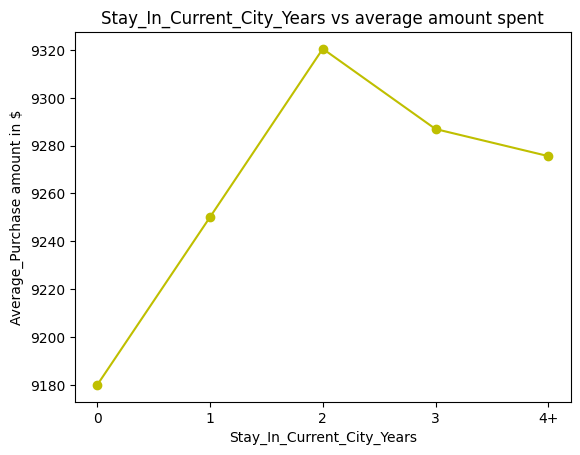

In [ ]:
# Avearge amount spend based on the time of stay in the current city

data = sales_1.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='y')
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Average_Purchase amount in $');
plt.title('Stay_In_Current_City_Years vs average amount spent');
plt.show()

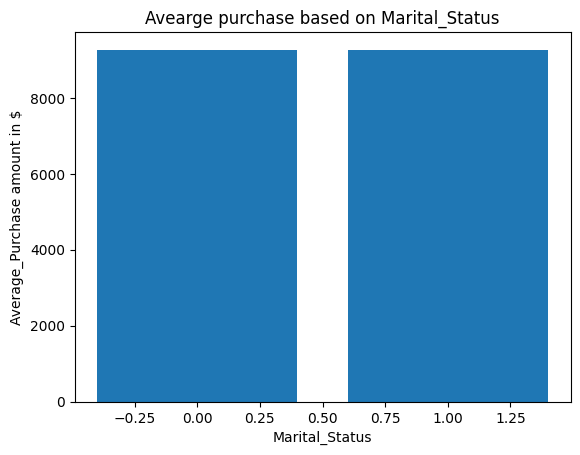

In [ ]:
# Avearge purchase based on Marital_Status

data = sales_1.groupby('Marital_Status')['Purchase'].mean()
plt.bar(data.index,data.values)
plt.xlabel('Marital_Status');
plt.ylabel('Average_Purchase amount in $');
plt.title('Avearge purchase based on Marital_Status');
plt.show()

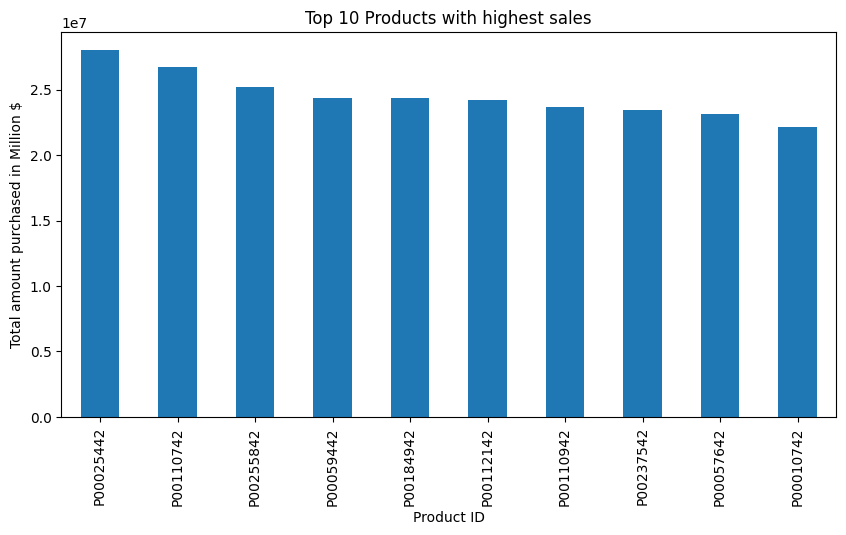

In [ ]:
# Top 10 products which made the highest sales

data = sales_1.groupby("Product_ID").sum()['Purchase']

plt.figure(figsize=(10,5))
data.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased in Million $')
plt.title('Top 10 Products with highest sales')
plt.show()

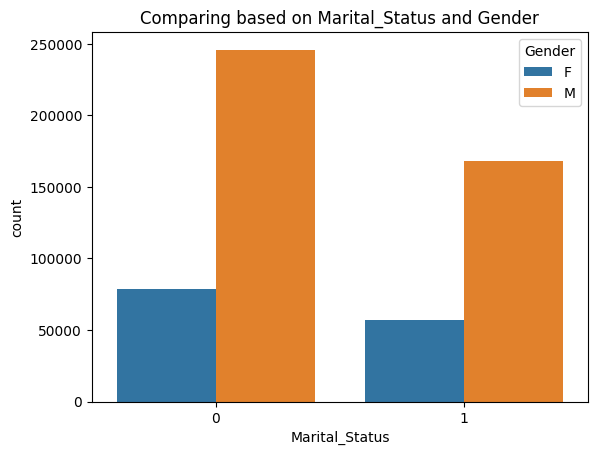

In [ ]:
#comparing based on Marital_Status and Gender

sns.countplot(x='Marital_Status',data=sales_1,hue='Gender')
plt.title('Comparing based on Marital_Status and Gender')
plt.show()

In [ ]:
a =pd.crosstab(sales_1['Age'],sales_1['Product_ID'])
a.idxmax(axis=1)

,0
Age,
0-17,P00255842
18-25,P00265242
26-35,P00265242
36-45,P00025442
46-50,P00265242
51-55,P00265242
55+,P00265242


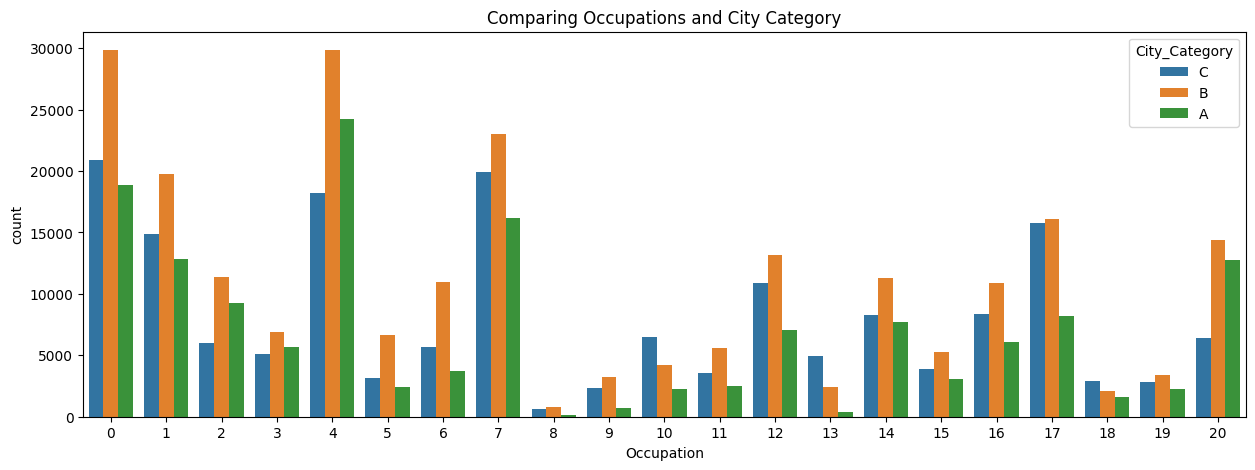

In [ ]:
#Occupations and City Category

plt.figure(figsize=(15,5))
sns.countplot(x='Occupation',data=sales_1,hue='City_Category')
plt.title('Comparing Occupations and City Category')
plt.show()

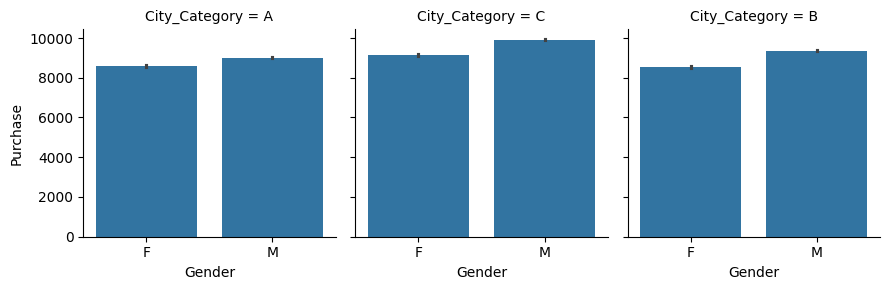

In [ ]:
#the purchase habits of different genders across the different city categories.

g = sns.FacetGrid(sales_1,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

**Data preprocessing**

In [ ]:
# for datapreprocessing again working with the combined dataset
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,15.0,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,16.0,7969.0,train


1. User_ID and Product_ID:

In [ ]:
# User_ID data preprocess. e.g. 1000002 -> 2

combined['User_ID'] = combined['User_ID'] - 1000000

# Product_ID preprocess e.g. P00069042 -> 69042

combined['Product_ID'] = combined['Product_ID'].str.replace('P00', '')

#object to int
combined['Product_ID'] = pd.to_numeric(combined['Product_ID'],errors='coerce')

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  data                        783667 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 77.7+ MB


2. Product_Category_2 :

In [ ]:
combined.Product_Category_2 = combined.Product_Category_2.astype('int64')

In [ ]:
# features with datatype object

cat_cols = combined.select_dtypes(['object']).columns
cat_cols

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'data'], dtype='object')

3. Stay_In_Current_City_Years

In [ ]:
# 4+ to 4
combined['Stay_In_Current_City_Years'] =np.where(combined['Stay_In_Current_City_Years'].str[:2]=="4+",4,combined['Stay_In_Current_City_Years'])

#object to int
combined['Stay_In_Current_City_Years'] = pd.to_numeric(combined['Stay_In_Current_City_Years'],errors='coerce')

4. Gender:

In [ ]:
combined['Gender'] = combined['Gender'].map({'F':0, 'M':1}).astype(int)

# Age

In [ ]:
# Modify age column

combined['Age'] = combined['Age'].map({'0-17': 9,
                               '18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})
combined['Age'].value_counts()

,count
Age,
31,313015
42,156724
22,141953
48,65278
53,54784
60,30579
9,21334


6. City_Category : dummy variables for this feature

In [ ]:
combined = pd.get_dummies(combined,columns=['City_Category'],drop_first = True)

In [ ]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,15,8370.0,train,False,False
1,1,248942,0,9,10,2,0,1,6,15200.0,train,False,False
2,1,87842,0,9,10,2,0,12,8,1422.0,train,False,False
3,1,85442,0,9,10,2,0,12,14,1057.0,train,False,False
4,2,285442,1,60,16,4,0,8,16,7969.0,train,False,True


In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  data                        783667 non-null  object 
 11  City_Category_B             783667 non-null  bool   
 12  City_Category_C             783667 non-null  bool   
dtypes: bool(2), float64

In [ ]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,15,8370.0,train,False,False
1,1,248942,0,9,10,2,0,1,6,15200.0,train,False,False
2,1,87842,0,9,10,2,0,12,8,1422.0,train,False,False
3,1,85442,0,9,10,2,0,12,14,1057.0,train,False,False
4,2,285442,1,60,16,4,0,8,16,7969.0,train,False,True


In [ ]:
#splitting the data back into train and test as it was already provided

sales = combined[combined['data']=='train']
del sales['data']
test_input = combined[combined['data']=='test']
test_input.drop(['Purchase','data'],axis=1,inplace=True)

del combined

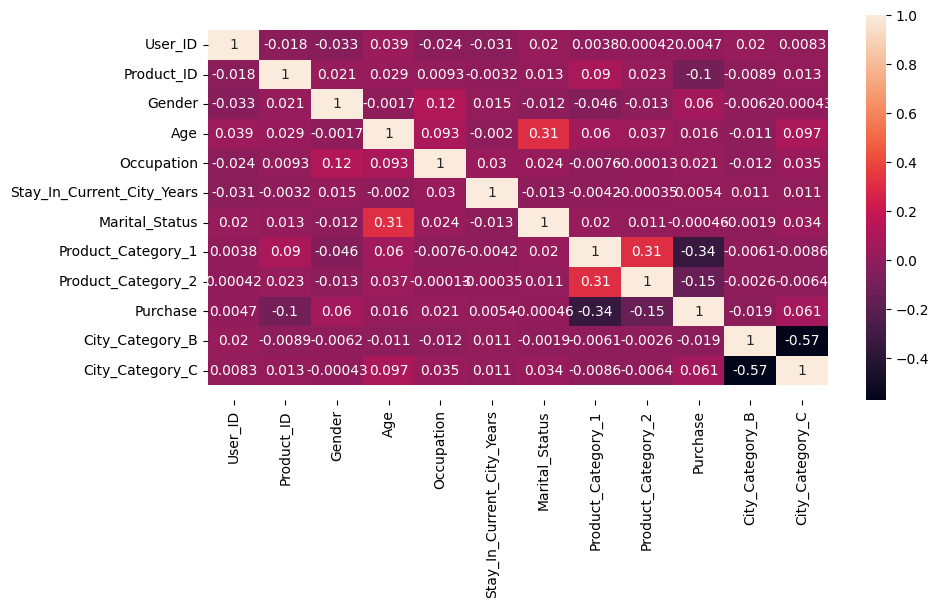

In [ ]:
#Heatmap to show the correlation between various variables of the train data set

plt.figure(figsize=(10, 5))
cor = sales.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Model building

In [ ]:
#splitting the data into X and y
X = sales.drop('Purchase',axis=1)
y = sales['Purchase']

#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
#Linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train) # training the algorithm

# Getting the coefficients and intercept

print('coefficients:\n', lr.coef_)
print('\n intercept:', lr.intercept_)

coefficients:
 [ 1.49700970e-02 -3.71032256e-03  5.34485298e+02  1.49898576e+01
  6.76156773e+00  1.27210122e+01 -5.95857258e+01 -4.10538759e+02
 -4.75854171e+01  1.78676122e+02  6.97700215e+02]

 intercept: 11277.232761456602


In [ ]:
#Predicting on the test data

y_pred = lr.predict(X_test)

from sklearn import metrics

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.13207302381496921
rmse: 4685.426491946747


In [ ]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

RR = Ridge(alpha=0.05) # remove normalize=True
RR.fit(X_train_scaled, y_train) # use scaled training data

y_pred = RR.predict(X_test_scaled) # use scaled test data

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 4685.426491553081


In [ ]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 2748.798259419245


In [ ]:
#Decision Tree 2

DT2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

DT2.fit(X_train, y_train)

y_pred = DT2.predict(X_test)

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 2883.986231922256


In [ ]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 3,max_depth=10,n_estimators=25)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.6906494935657517
rmse: 2797.260746282218


In [ ]:
# another random forest

from sklearn.ensemble import RandomForestRegressor

rf3 = RandomForestRegressor(random_state=3,max_depth=10,min_samples_split=500,oob_score=True)


rf3.fit(X_train,y_train)

y_pred = rf3.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

ExtraTreesRegressor :

In [ ]:
#Fitting the model
from sklearn.ensemble import ExtraTreesRegressor

rf = ExtraTreesRegressor()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

XG BRegressor :

In [ ]:
#XGBoost Model1
from xgboost import XGBRegressor


xgb1 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

xgb1.fit(X_train,y_train)

y_pred = xgb1.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
## XGBoost2
from xgboost import XGBRegressor

xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X_train,y_train)

y_pred = xgb2.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X,y)
predict = xgb2.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('Sample_Submission_XGB2.csv')

#score: 2522.743

In [ ]:
## XGBoost3

xgb3 = XGBRegressor(n_estimators=6,max_depth=500)

xgb3.fit(X_train,y_train)

y_pred = xgb3.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
#XGBoost4

xgb4 = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb4.fit(X_train,y_train)

y_pred = xgb4.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
#XGBoost5
from xgboost import XGBRegressor

xgb5 = XGBRegressor(n_estimators=450,max_depth=8,learning_rate=0.076)

xgb5.fit(X_train,y_train)

y_pred = xgb5.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
#XGBoost6
from xgboost import XGBRegressor

xgb6 = XGBRegressor(n_estimators=470,max_depth=9,learning_rate=0.06)

xgb6.fit(X_train,y_train)

y_pred = xgb6.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Conclusion

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head()

In [ ]:
# Feature Importance

imp = pd.DataFrame(xgb2.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.scatter(df1.Predicted,df1.Actual)
plt.plot(y_pred,y_pred,'r')
plt.xlabel('y predicted')
plt.ylabel('y actual')
plt.show()